## Unsupervised Machine Learning

# K-Means Clustering

K-Means clustering means the grouping things which are similar or have features in common, grouping data points based on how close they are to our centroid.

## Lets Practise

In [3]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#importing the dataset
dataset= pd.read_csv('Downloads/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
dataset.rename({'Genre': 'Gender'}, axis = 1, inplace=True)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
#invoking fit_transform method on object
dataset['Gender']=le.fit_transform(dataset['Gender'])

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
dataset['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

## Visualisations

<Axes: title={'center': 'Count of Males and Females'}, xlabel='Gender', ylabel='count'>

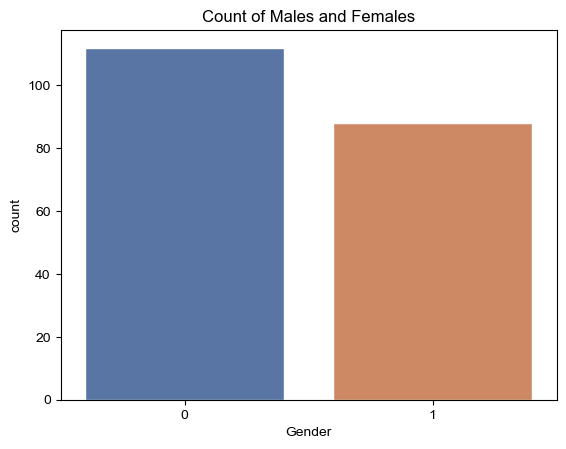

In [17]:
#count of males and females

plt.title('Count of Males and Females')
sns.set(style='darkgrid')
sns.countplot(x=dataset['Gender'])


In [18]:
dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


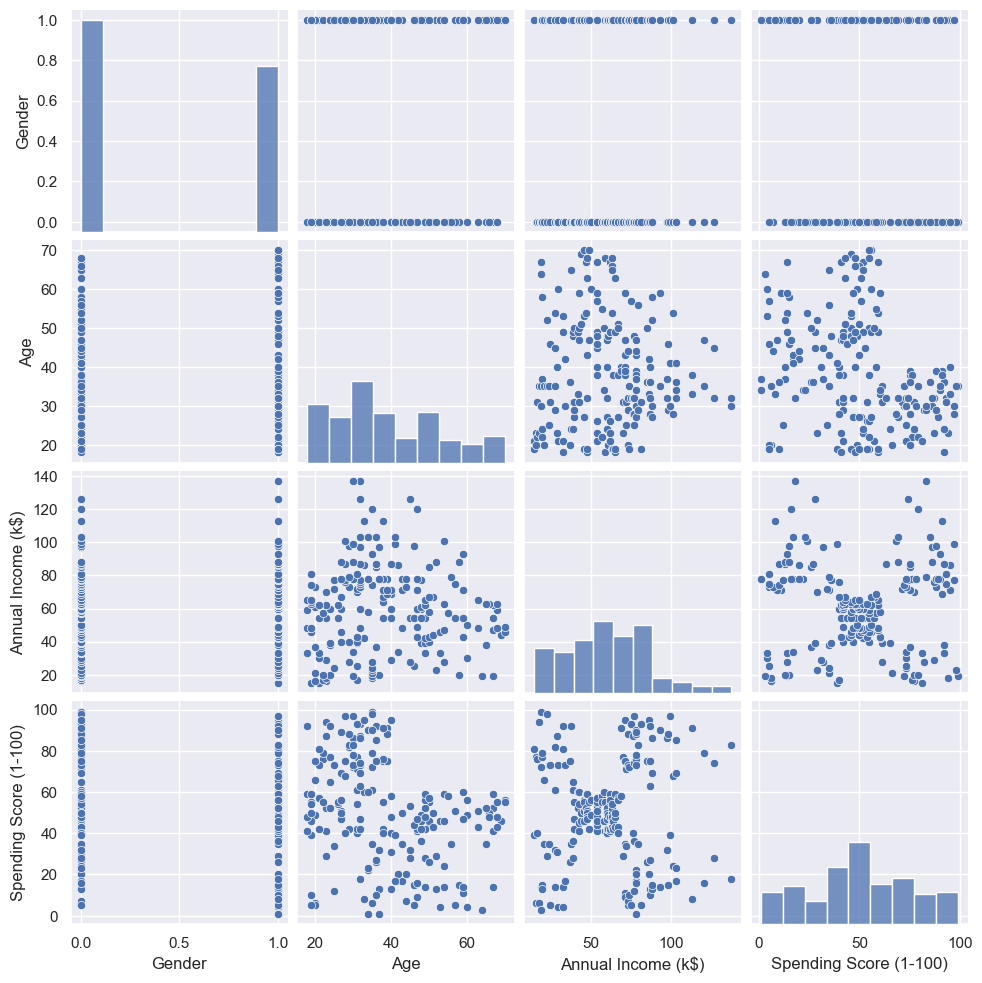

In [19]:
sns.pairplot(dataset.iloc[:, 1:5])

In [21]:
X= dataset.iloc[:, [3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## To find the best value of K in as a data scientist



C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

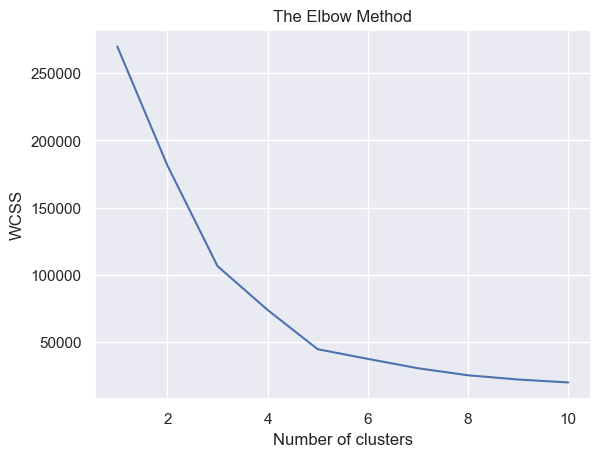

In [30]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss= []
for i in range(1,11): #Test 1 to 10 different clusters
#Loop over the indented statements 10 times to see how distance reduces till it becomes steady    
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X) #Train the model for all the 10 clusters and append into wcss list
    
    wcss.append(kmeans.inertia_) #Add each sum of squared distances to wcss[] list
plt.plot(range(1,11), wcss) #plot the ten different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()         
       

# The sum of squared distances started to stabilize from the 5th cluster, Therefore the best cluster (k) in this task is 5

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(X)
#The predicted cluster centers are stored in y_kmeans

C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OMODOLAPO ADEDEJI\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
#Adding the predicted clusters 
X['Centroid']=y_kmeans
#Now, different observations has been assigned to different cluster centres
X

C:\Users\OMODOLAPO ADEDEJI\AppData\Local\Temp\ipykernel_11712\1842103288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centroid']=y_kmeans


,Annual Income (k$),Spending Score (1-100),Centroid
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [34]:
## Visualising the clusters

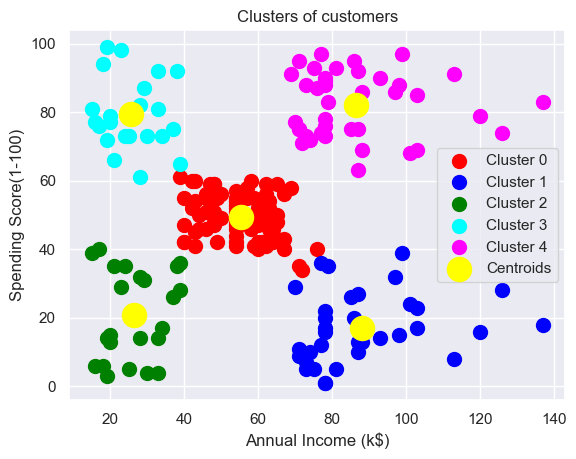

In [36]:
#unzip all values for all column in X Dataframe and store them in x(array)

x=X.values

#x[y_kmeans==0, 0 ] is a conditional statement that prints the value of x[i], for all i in X, only if where y_kmeans==0

plt.scatter(x[y_kmeans ==0,0], x[y_kmeans == 0,1], s= 100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans == 1,1], s= 100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans == 2,1], s= 100, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans ==3,0], x[y_kmeans == 3,1], s= 100, c='cyan', label='Cluster 3')
plt.scatter(x[y_kmeans ==4,0], x[y_kmeans == 4,1], s= 100, c='magenta', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [37]:
x

array([[ 15,  39,   2],
       [ 15,  81,   3],
       [ 16,   6,   2],
       [ 16,  77,   3],
       [ 17,  40,   2],
       [ 17,  76,   3],
       [ 18,   6,   2],
       [ 18,  94,   3],
       [ 19,   3,   2],
       [ 19,  72,   3],
       [ 19,  14,   2],
       [ 19,  99,   3],
       [ 20,  15,   2],
       [ 20,  77,   3],
       [ 20,  13,   2],
       [ 20,  79,   3],
       [ 21,  35,   2],
       [ 21,  66,   3],
       [ 23,  29,   2],
       [ 23,  98,   3],
       [ 24,  35,   2],
       [ 24,  73,   3],
       [ 25,   5,   2],
       [ 25,  73,   3],
       [ 28,  14,   2],
       [ 28,  82,   3],
       [ 28,  32,   2],
       [ 28,  61,   3],
       [ 29,  31,   2],
       [ 29,  87,   3],
       [ 30,   4,   2],
       [ 30,  73,   3],
       [ 33,   4,   2],
       [ 33,  92,   3],
       [ 33,  14,   2],
       [ 33,  81,   3],
       [ 34,  17,   2],
       [ 34,  73,   3],
       [ 37,  26,   2],
       [ 37,  75,   3],
       [ 38,  35,   2],
       [ 38,  92

## What can you infer from the plot above

Fron here we can see the different groups this data was clustered into 5

Low income earners and low spending score

High Income Earners and Low spending score 

high spending score and low income

high spending score and high income 

and

average spending score and average income earners 

There are also outliers in the data set but thats all i can see